#9. Code để thống kê và so sánh kết quả khi chạy 3 thuật toán BFS, IDDFS, A* 

In [ ]:
pip install matplotlib

In [7]:
import pickle
import matplotlib.pyplot as plt
import BFS
import A_search
import IDDFS

In [8]:
# Load đồ thị
file_path = r"graph_with_attributes.pkl"
with open(file_path, "rb") as file:
    graph = pickle.load(file)

# Cố dịnh ending article
ending_article = "Minecraft"

#Đọc các starting articles từ file với UTF-8
with open("randomized_article_names.txt", "r", encoding="utf-8") as file:
    starting_articles = file.read().splitlines()

In [9]:
# Số lần chạy
num_runs = 100

# Thiết lập biến để đếm
bfs_path_exists_count = 0
astar_path_exists_count = 0
idfs_path_exists_count = 0
bfs_total_path_length = 0
astar_total_path_length = 0
idfs_total_path_length = 0
bfs_total_node_count = 0
astar_total_node_count = 0
idfs_total_node_count = 0
bfs_total_runtime = 0
idfs_total_runtime = 0
astar_total_runtime = 0
run_count = 0
valid_runs = 0

In [10]:
# Thực hiện các lần chạy
for starting_article in starting_articles:
    if run_count == num_runs:
        break

    run_count += 1
    print(run_count)
    # Thực hiênh BFS
    bfs_path_length, bfs_path, bfs_runtime, bfs_node_count = BFS.bfs_search(
        graph, starting_article, ending_article)
    if bfs_path_length is None:
        astar_path, astar_path_length, astar_runtime, astar_node_count = None, None, None, None
        idfs_path, idfs_path_length, idfs_runtime, idfs_node_count = None, None, None, None
        continue
    # Thực hiện A*
    astar_path, astar_node_count, astar_runtime, astar_path_length = A_search.astar(graph, starting_article,
                                                                                    ending_article)

    # Thực hiện IDDFS
    idfs_path, idfs_path_length, idfs_runtime, idfs_node_count = IDDFS.iddfs_search(graph, starting_article,
                                                                                    ending_article, 10)

    # Cập nhật các biến đếm
    if bfs_path_length is not None:
        valid_runs += 1
        bfs_path_exists_count += 1
        bfs_total_path_length += bfs_path_length
        bfs_total_runtime += bfs_runtime

    if astar_path_length is not None:
        astar_path_exists_count += 1
        astar_total_path_length += astar_path_length
        astar_total_runtime += astar_runtime

    if idfs_path_length is not None:
        idfs_path_exists_count += 1
        idfs_total_path_length += idfs_path_length
        idfs_total_runtime += idfs_runtime

    bfs_total_node_count += bfs_node_count
    astar_total_node_count += astar_node_count
    idfs_total_node_count += idfs_node_count

    # In kết quả
    print("--- Run", run_count, "with Starting Article:", starting_article, "---")
    print("--- BFS ---")
    if bfs_path_length is not None:
        print("Path Exists: Yes")
        print("Path:", bfs_path)
        print("Path Length:", bfs_path_length)
    else:
        print("Path Exists: No")
    print("Runtime:", bfs_runtime)
    print("Number of Nodes Visited:", bfs_node_count)

    print("--- A* ---")
    if astar_path_length is not None:
        print("Path Exists: Yes")
        print("Path:", astar_path)
        print("Path Length:", astar_path_length)
    else:
        print("Path Exists: No")
    print("Runtime:", astar_runtime)
    print("Number of Nodes Visited:", astar_node_count)

    print("--- IDFS ---")
    if idfs_path_length is not None:
        print("Path Exists: Yes")
        print("Path:", idfs_path)
        print("Path Length:", idfs_path_length)
    else:
        print("Path Exists: No")
    print("Runtime:", idfs_runtime)
    print("Number of Nodes Visited:", idfs_node_count)
    print("\n")

1
2
--- Run 2 with Starting Article: London Underground C69 and C77 Stock ---
--- BFS ---
Path Exists: Yes
Path: ['London Underground C69 and C77 Stock', 'London Underground', 'Jubilee line', 'September 17', '2011', 'Minecraft']
Path Length: 6
Runtime: 1.3737776279449463
Number of Nodes Visited: 58791
--- A* ---
Path Exists: Yes
Path: ['London Underground C69 and C77 Stock', 'England', 'United States', 'Xbox Game Studios', 'Microsoft', 'Minecraft']
Path Length: 6
Runtime: 312.44802021980286
Number of Nodes Visited: 27168
--- IDFS ---
Path Exists: Yes
Path: ['London Underground C69 and C77 Stock', 'London Underground', 'Jubilee line', 'September 17', '2011', 'Minecraft']
Path Length: 6
Runtime: 0.26586246490478516
Number of Nodes Visited: 17528


3
--- Run 3 with Starting Article: Welsh Marches ---
--- BFS ---
Path Exists: Yes
Path: ['Welsh Marches', 'Earl', 'Kent', '1990s', '2011', 'Minecraft']
Path Length: 6
Runtime: 1.5426418781280518
Number of Nodes Visited: 50887
--- A* ---
Path Ex

In [11]:
# Tính kết quả trung bình
bfs_average_path_length = bfs_total_path_length / \
    bfs_path_exists_count if bfs_path_exists_count > 0 else 0
astar_average_path_length = astar_total_path_length / \
    astar_path_exists_count if astar_path_exists_count > 0 else 0
idfs_average_path_length = idfs_total_path_length / \
    idfs_path_exists_count if idfs_path_exists_count > 0 else 0
bfs_average_node_count = bfs_total_node_count / valid_runs
astar_average_node_count = astar_total_node_count / valid_runs
idfs_average_node_count = idfs_total_node_count / valid_runs
bfs_average_runtime = bfs_total_runtime / valid_runs if valid_runs > 0 else 0
astar_average_runtime = astar_total_runtime / valid_runs if valid_runs > 0 else 0
idfs_average_runtime = idfs_total_runtime / valid_runs if valid_runs > 0 else 0

# In thống kế
print("--- Overall Results ---")
print("Number of Runs:", run_count)
print("BFS Path Exists Count:", bfs_path_exists_count)
print("BFS Average Path Length:", bfs_average_path_length)
print("BFS Average Number of Nodes Visited:", bfs_average_node_count)
print("BFS Average Runtime:", bfs_average_runtime)
print("\n")
print("A* Path Exists Count:", astar_path_exists_count)
print("A* Average Path Length:", astar_average_path_length)
print("A* Average Number of Nodes Visited:", astar_average_node_count)
print("A* Average Runtime:", astar_average_runtime)
print("\n")
print("IDFS Path Exists Count:", idfs_path_exists_count)
print("IDFS Average Path Length:", idfs_average_path_length)
print("IDFS Average Number of Nodes Visited:", idfs_average_node_count)
print("IDFS Average Runtime:", idfs_average_runtime)

--- Overall Results ---
Number of Runs: 100
BFS Path Exists Count: 95
BFS Average Path Length: 5.242105263157895
BFS Average Number of Nodes Visited: 29270.76842105263
BFS Average Runtime: 0.7622480944583291


A* Path Exists Count: 95
A* Average Path Length: 5.242105263157895
A* Average Number of Nodes Visited: 7414.021052631579
A* Average Runtime: 182.03338972141867


IDFS Path Exists Count: 95
IDFS Average Path Length: 5.242105263157895
IDFS Average Number of Nodes Visited: 6625.61052631579
IDFS Average Runtime: 0.0881058416868511


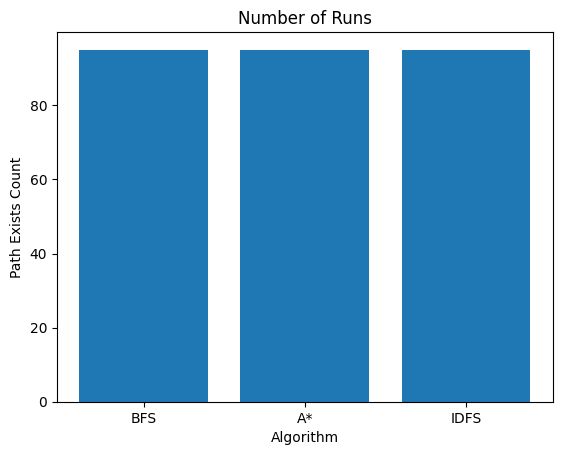

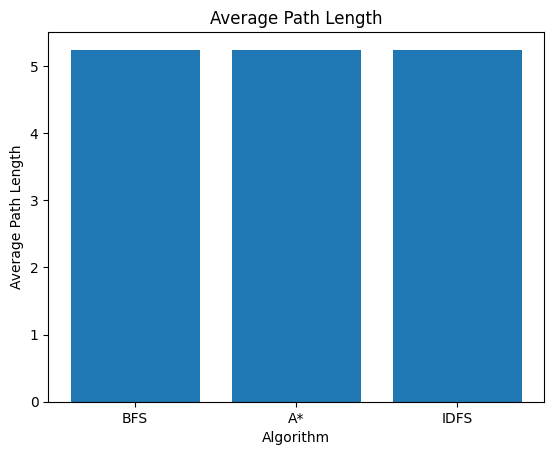

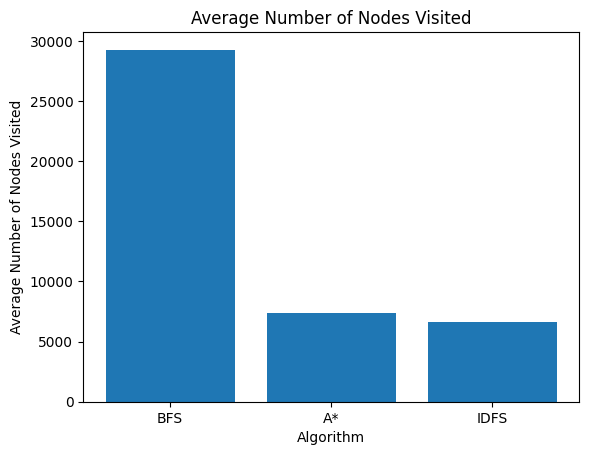

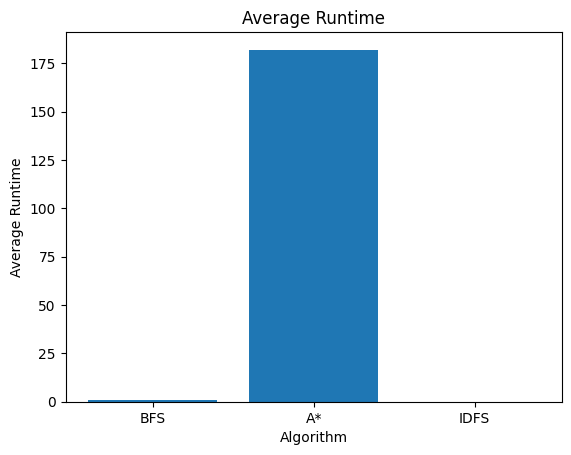

In [12]:
# Create a bar plot for the number of runs
x = ["BFS", "A*", "IDFS"]
y = [bfs_path_exists_count, astar_path_exists_count, idfs_path_exists_count]
plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("Path Exists Count")
plt.title("Number of Runs")
plt.show()

# Create a bar plot for the average path length
x = ["BFS", "A*", "IDFS"]
y = [bfs_average_path_length, astar_average_path_length, idfs_average_path_length]
plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("Average Path Length")
plt.title("Average Path Length")
plt.show()

# Create a bar plot for the average number of nodes visited
x = ["BFS", "A*", "IDFS"]
y = [bfs_average_node_count, astar_average_node_count, idfs_average_node_count]
plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("Average Number of Nodes Visited")
plt.title("Average Number of Nodes Visited")
plt.show()

# Create a bar plot for the average runtime
x = ["BFS", "A*", "IDFS"]
y = [bfs_average_runtime, astar_average_runtime, idfs_average_runtime]
plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("Average Runtime")
plt.title("Average Runtime")
plt.show()